Summary Statistics:
shape: (9, 5)
┌────────────┬────────────┬──────────┬────────────┬─────────────┐
│ statistic  ┆ date       ┆ time     ┆ multiplier ┆ game_round  │
│ ---        ┆ ---        ┆ ---      ┆ ---        ┆ ---         │
│ str        ┆ str        ┆ str      ┆ f64        ┆ f64         │
╞════════════╪════════════╪══════════╪════════════╪═════════════╡
│ count      ┆ 67         ┆ 67       ┆ 67.0       ┆ 67.0        │
│ null_count ┆ 0          ┆ 0        ┆ 0.0        ┆ 0.0         │
│ mean       ┆ null       ┆ null     ┆ 4.378507   ┆ 5492.492537 │
│ std        ┆ null       ┆ null     ┆ 10.21108   ┆ 3055.396544 │
│ min        ┆ 2025-04-16 ┆ 21:16:15 ┆ 1.0        ┆ 45.0        │
│ 25%        ┆ null       ┆ null     ┆ 1.21       ┆ 3037.0      │
│ 50%        ┆ null       ┆ null     ┆ 1.53       ┆ 5785.0      │
│ 75%        ┆ null       ┆ null     ┆ 3.98       ┆ 8355.0      │
│ max        ┆ 2025-04-16 ┆ 21:41:12 ┆ 80.15      ┆ 9973.0      │
└────────────┴────────────┴──────────┴────

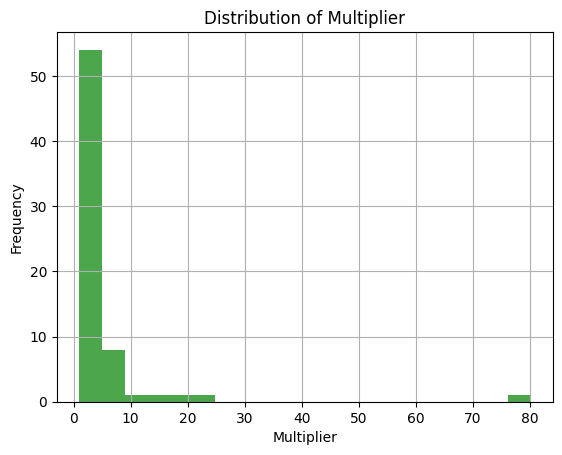

Summary Statistics:
shape: (9, 5)
┌────────────┬────────────┬──────────┬────────────┬─────────────┐
│ statistic  ┆ date       ┆ time     ┆ multiplier ┆ game_round  │
│ ---        ┆ ---        ┆ ---      ┆ ---        ┆ ---         │
│ str        ┆ str        ┆ str      ┆ f64        ┆ f64         │
╞════════════╪════════════╪══════════╪════════════╪═════════════╡
│ count      ┆ 83         ┆ 83       ┆ 83.0       ┆ 83.0        │
│ null_count ┆ 0          ┆ 0        ┆ 0.0        ┆ 0.0         │
│ mean       ┆ null       ┆ null     ┆ 6.227229   ┆ 4955.0      │
│ std        ┆ null       ┆ null     ┆ 17.03857   ┆ 2762.134293 │
│ min        ┆ 2025-04-16 ┆ 20:14:41 ┆ 1.0        ┆ 14.0        │
│ 25%        ┆ null       ┆ null     ┆ 1.34       ┆ 2647.0      │
│ 50%        ┆ null       ┆ null     ┆ 1.79       ┆ 4888.0      │
│ 75%        ┆ null       ┆ null     ┆ 3.12       ┆ 7352.0      │
│ max        ┆ 2025-04-16 ┆ 20:49:19 ┆ 134.24     ┆ 9967.0      │
└────────────┴────────────┴──────────┴────

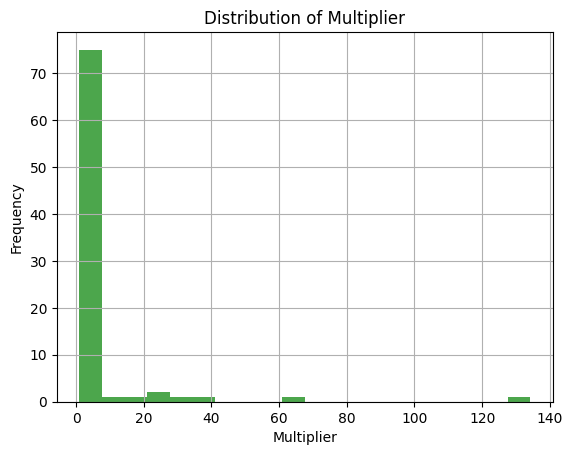

Summary Statistics:
shape: (9, 5)
┌────────────┬────────────┬──────────┬────────────┬─────────────┐
│ statistic  ┆ date       ┆ time     ┆ multiplier ┆ game_round  │
│ ---        ┆ ---        ┆ ---      ┆ ---        ┆ ---         │
│ str        ┆ str        ┆ str      ┆ f64        ┆ f64         │
╞════════════╪════════════╪══════════╪════════════╪═════════════╡
│ count      ┆ 60         ┆ 60       ┆ 60.0       ┆ 60.0        │
│ null_count ┆ 0          ┆ 0        ┆ 0.0        ┆ 0.0         │
│ mean       ┆ null       ┆ null     ┆ 14.480667  ┆ 5384.083333 │
│ std        ┆ null       ┆ null     ┆ 75.032134  ┆ 2655.484719 │
│ min        ┆ 2025-04-17 ┆ 00:38:39 ┆ 1.0        ┆ 242.0       │
│ 25%        ┆ null       ┆ null     ┆ 1.22       ┆ 3186.0      │
│ 50%        ┆ null       ┆ null     ┆ 1.91       ┆ 5859.0      │
│ 75%        ┆ null       ┆ null     ┆ 3.15       ┆ 7715.0      │
│ max        ┆ 2025-04-17 ┆ 01:17:26 ┆ 576.34     ┆ 9724.0      │
└────────────┴────────────┴──────────┴────

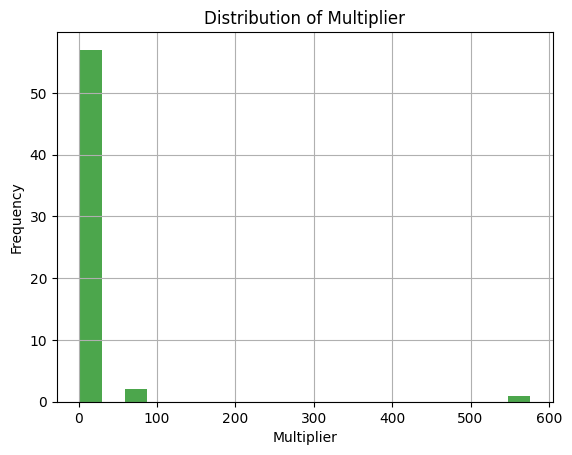

In [6]:
import polars as pl
import random
import matplotlib.pyplot as plt


bet_history_files = [
    'live_bet_history/live_bet_history_20250416_211412.json',
    'live_bet_history/live_bet_history_20250416_201112.json',
    'live_bet_history/live_bet_history_20250417_003634.json',
]

for bet_history_file in bet_history_files:
    with open(bet_history_file, "r") as f:
        bet_history: pl.DataFrame = pl.read_json(
            bet_history_file,
        ).select(
            ["date", "time", "multiplier"]
        )
        bet_history = bet_history.with_columns(
            pl.Series("game_round", [random.randint(1, 10000) for _ in range(len(bet_history))])
        )

        # Exploratory Analysis
        print("Summary Statistics:")
        print(bet_history.describe())

        print("\nFirst 5 Rows:")
        print(bet_history.head())

        print("\nData Types:")
        print(bet_history.dtypes)

        print("\nNull Values:")
        print(bet_history.null_count())

        # Plot histogram of the multiplier column
        plt.hist(bet_history["multiplier"], bins=20, color='g', alpha=0.7)
        plt.title("Distribution of Multiplier")
        plt.xlabel("Multiplier")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
